In [4]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.12.0


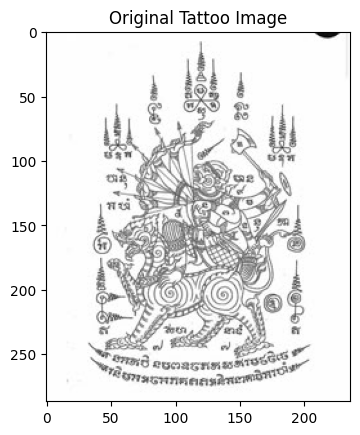

In [5]:
# Read image
img = cv2.imread("tattoo/6c25875fde8a328bb9ca67c1049028e5.jpg")
plt.imshow(img[:, :, ::-1])
plt.title("Original Tattoo Image")
plt.show()

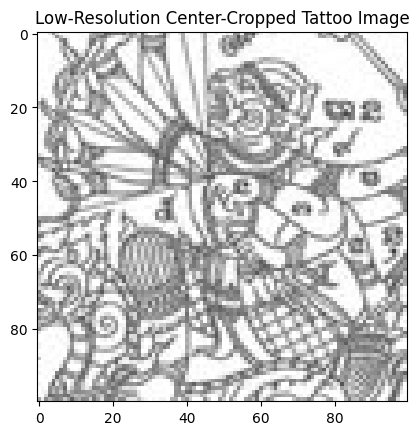

In [6]:
def center_crop_and_downscale(img, crop_h=100, crop_w=100, scale=1):
    h, w, _ = img.shape
    start_y = max((h - crop_h) // 2, 0)
    start_x = max((w - crop_w) // 2, 0)
    cropped = img[start_y:start_y+crop_h, start_x:start_x+crop_w]
    new_h, new_w = cropped.shape[0] // scale, cropped.shape[1] // scale
    return cv2.resize(cropped, (new_w, new_h))

low_res = center_crop_and_downscale(img)
plt.imshow(low_res)
plt.title("Low-Resolution Center-Cropped Tattoo Image")
plt.show()


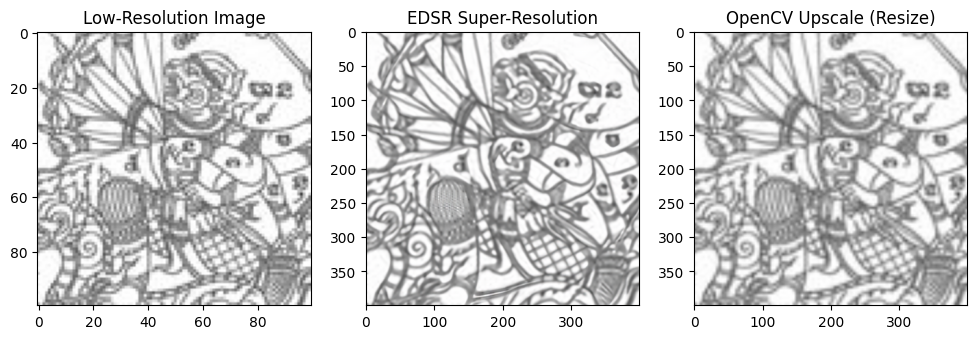

In [7]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "superResModels/EDSR_x4.pb"

sr.readModel(path)

sr.setModel("edsr", 4)

result = sr.upsample(low_res)

# Resized image
resized = cv2.resize(low_res, dsize=None, fx=4, fy=4)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
# Original image
plt.imshow(low_res[:, :, ::-1])
plt.title("Low-Resolution Image")
plt.subplot(1, 3, 2)
# SR upscaled
plt.imshow(result[:, :, ::-1])
plt.title("EDSR Super-Resolution")
plt.subplot(1, 3, 3)
# OpenCV upscaled
plt.imshow(resized[:, :, ::-1])
plt.title("OpenCV Upscale (Resize)")
plt.show()

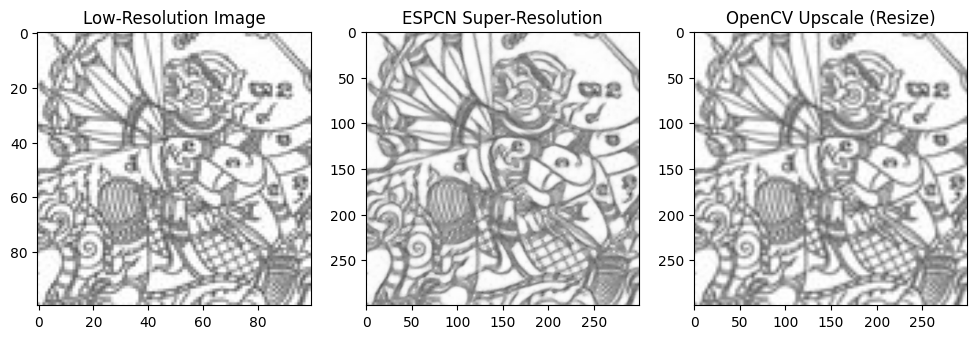

In [8]:
path = "superResModels/ESPCN_x3.pb"

sr.readModel(path)

sr.setModel("espcn", 3)

result = sr.upsample(low_res)

# Resized image
resized = cv2.resize(low_res, dsize=None, fx=3, fy=3)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
# Original image
plt.imshow(low_res[:, :, ::-1])
plt.title("Low-Resolution Image")
plt.subplot(1, 3, 2)
# SR upscaled
plt.imshow(result[:, :, ::-1])
plt.title("ESPCN Super-Resolution")
plt.subplot(1, 3, 3)
# OpenCV upscaled
plt.imshow(resized[:, :, ::-1])
plt.title("OpenCV Upscale (Resize)")
plt.show()

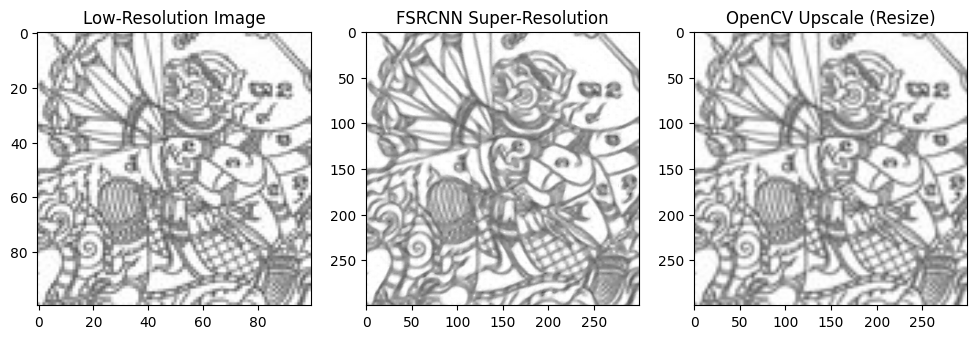

In [9]:
path = "superResModels/FSRCNN_x3.pb"

sr.readModel(path)

sr.setModel("fsrcnn", 3)

result = sr.upsample(low_res)

# Resized image
resized = cv2.resize(low_res, dsize=None, fx=3, fy=3)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
# Original image
plt.imshow(low_res[:, :, ::-1])
plt.title("Low-Resolution Image")
plt.subplot(1, 3, 2)
# SR upscaled
plt.imshow(result[:, :, ::-1])
plt.title("FSRCNN Super-Resolution")
plt.subplot(1, 3, 3)
# OpenCV upscaled
plt.imshow(resized[:, :, ::-1])
plt.title("OpenCV Upscale (Resize)")
plt.show()

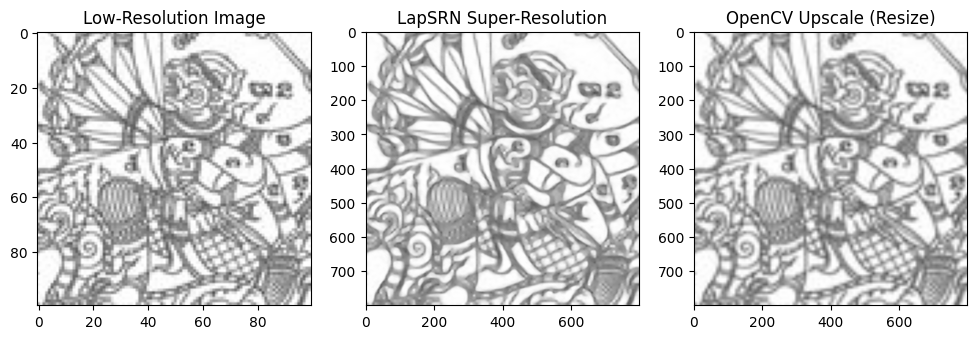

In [10]:
path = "superResModels/LapSRN_x8.pb"

sr.readModel(path)

sr.setModel("lapsrn", 8)

result = sr.upsample(low_res)

# Resized image
resized = cv2.resize(low_res, dsize=None, fx=8, fy=8)

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
# Original image
plt.imshow(low_res[:, :, ::-1])
plt.title("Low-Resolution Image")
plt.subplot(1, 3, 2)
# SR upscaled
plt.imshow(result[:, :, ::-1])
plt.title("LapSRN Super-Resolution")
plt.subplot(1, 3, 3)
# OpenCV upscaled
plt.imshow(resized[:, :, ::-1])
plt.title("OpenCV Upscale (Resize)")
plt.show()